## Đồ án cuối kỳ môn Nhập môn Khoa học dữ liệu nhóm 40 gồm 2 thành viên:
- Phạm Như Quyền - 1712714
- Nguyễn Hữu Thắng - 1712756



## IMPORT THƯ VIỆN PYTHON CẦN THIẾT

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

from sklearn import set_config
set_config(display='diagram')

## ĐỌC DỮ LIỆU TỪ TỆP ĐÃ THU THẬP movie_IMDB.csv

In [2]:
df = pd.read_csv("movie_IMDB.csv")

In [3]:
df.head()

,titles,genres,certificates,votes,metascores,ratings,directors,stars,gross,introduction,produce_year,runtime
0,Soul,"Animation,Adventure,Comedy",PG,126286,83.0,8.1,"Pete Docter, Kemp Powers","Jamie Foxx, Tina Fey, Graham Norton, Rach...",NaN,A musician who has lost his passion for mus...,2020,100
1,Another Round,"Comedy,Drama",Not Rated,26017,81.0,7.8,Thomas Vinterberg,"Mads Mikkelsen, Thomas Bo Larsen, Magnus ...",NaN,"Four friends, all high school teachers, tes...",2020,117
2,Avengers: Endgame,"Action,Adventure,Drama",PG-13,800050,78.0,8.4,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruff...",858.37,After the devastating events of Avengers: I...,2019,181
3,The Gentlemen,"Action,Comedy,Crime",R,230044,NaN,7.8,Guy Ritchie,"Matthew McConaughey, Charlie Hunnam, Mich...",NaN,An American expat tries to sell off his hig...,2019,113
4,Parasite,"Comedy,Drama,Thriller",R,540872,96.0,8.6,Bong Joon Ho,"Song Kang-Ho, Lee Sun-kyun, Cho Yeo-jeong...",53.37,Greed and class discrimination threaten the...,2019,132


## Khám phá dữ liệu

### Kích thước của bộ dữ liệu

In [4]:
df.shape

(1000, 12)

### Kiểm tra kiểu dữ liệu của mỗi cột có phù hợp hay không

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titles        1000 non-null   object 
 1   genres        1000 non-null   object 
 2   certificates  989 non-null    object 
 3   votes         1000 non-null   int64  
 4   metascores    770 non-null    float64
 5   ratings       1000 non-null   float64
 6   directors     1000 non-null   object 
 7   stars         1000 non-null   object 
 8   gross         832 non-null    float64
 9   introduction  1000 non-null   object 
 10  produce_year  1000 non-null   object 
 11  runtime       1000 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


Ta thấy kiểu dữ liệu phù hợp với dữ liệu trừ cột produce_year nên mang kiểu numeric hơn là object. 

Kiểm tra dữ liệu có bị trùng không

In [6]:
df.index.duplicated().sum()

0

###  Ý nghĩa của các cột trong bộ dữ liệu

In [7]:
with open('description.txt', 'r') as f:
    print(f.read())

VARIABLE DESCRIPTIONS:
titles          Movies titles.
genres          Movies types.
certificates    The license type of the movie.
votes           Numbers of Votes.
metascores      Metascore Based on critic reviews provided by Metacritic.com
directors       Directors name.
stars           Stars list name.
gross           Movies gross.
introduction    Introduction of Movies
produce_year    Movies released years
runtime         Movies runtimes(min).
ratings         A weighted average voted by user ratings. 



### Kiểu dữ liệu của mỗi cột

In [8]:
df.dtypes

titles           object
genres           object
certificates     object
votes             int64
metascores      float64
ratings         float64
directors        object
stars            object
gross           float64
introduction     object
produce_year     object
runtime           int64
dtype: object

### Nội dung tóm tắt của các phim

In [9]:
pd.set_option('display.max_colwidth',None)
intro_content_df = df[["titles","introduction"]]
intro_content_df.head(20) # 20 Phim đầu

,titles,introduction
0,Soul,A musician who has lost his passion for music is transported out of his body and must find his way back with the help of an infant soul learning about herself.
1,Another Round,"Four friends, all high school teachers, test a theory that they will improve their lives by maintaining a constant level of alcohol in their blood."
2,Avengers: Endgame,"After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe."
3,The Gentlemen,"An American expat tries to sell off his highly profitable marijuana empire in London, triggering plots, schemes, bribery and blackmail in an attempt to steal his domain out from under him."
4,Parasite,Greed and class discrimination threaten the newly formed symbiotic relationship between the wealthy Park family and the destitute Kim clan.
5,The Godfather,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.
6,Knives Out,"A detective investigates the death of a patriarch of an eccentric, combative family."
7,1917,"April 6th, 1917. As a regiment assembles to wage war deep in enemy territory, two soldiers are assigned to race against time and deliver a message that will stop 1,600 men from walking straight into a deadly trap."
8,Harry Potter and the Sorcerer's Stone,"An orphaned boy enrolls in a school of wizardry, where he learns the truth about himself, his family and the terrible evil that haunts the magical world."
9,The Trial of the Chicago 7,"The story of 7 people on trial stemming from various charges surrounding the uprising at the 1968 Democratic National Convention in Chicago, Illinois."


### Tiền xử lý với cột produce_year

In [10]:
# Kiểm tra các giá trị của produce_year
df['produce_year'].unique()

array(['2020', '2019', '1972', '2001', '1994', '2013', '2014', '2015',
       '2018', '2008', '2010', '2017', '1990', '2005', '2002', '2009',
       '1999', '2006', '2000', '2016', '1977', '2003', '1997', '2011',
       '1995', '1985', '1965', '2007', '2012', '1998', '1988', '1974',
       '1981', '1993', '1979', 'I 2017', '1991', '1987', 'I 2015',
       'I 2013', '1983', '2004', '1980', '1984', '1976', '1946', '1982',
       'I 2016', '1975', '1941', '1986', '1971', '1996', '1957', '1989',
       'I 1995', 'II 2016', '1966', '1992', '1958', '1962', 'I 2011',
       '1968', '1942', '1964', '1960', '1939', '1967', '1954', '1973',
       '1978', 'I 2008', 'I 2004', '1963', 'II 2015', '1959', 'III 2018',
       '1952', 'I 2010', 'I 2014', '1940', '1961', '1969', '1950', '1931',
       '1956', '1927', '1938', '1937', '1951', '1934', '1970', '1936',
       'I 2007', '1949', '1933', '1955', '1944', '1953', '1948', '1947',
       '1922', '1930', '1921', '1943', '1932', '1920', '1935', '1925'

In [11]:
# Thay đổi xoá giá trị quí của produce_year và chuyển cột này sang kiểu numeric 
df['produce_year'] = df['produce_year'].str.replace("I ","")
df['produce_year'] = df['produce_year'].str.replace("I","")
df['produce_year'] = df['produce_year'].str.replace("II ","")
df['produce_year'] = df['produce_year'].str.replace("II","")
df['produce_year'] = df['produce_year'].str.replace("III ","")
df['produce_year'] = df['produce_year'].str.replace("III","")
df['produce_year'] = df['produce_year'].str.replace("IV ","")
df['produce_year'] = df['produce_year'].str.replace("IV","")
df['produce_year']=pd.to_numeric(df['produce_year'], errors='coerce')
df['produce_year'].unique()

array([2020, 2019, 1972, 2001, 1994, 2013, 2014, 2015, 2018, 2008, 2010,
       2017, 1990, 2005, 2002, 2009, 1999, 2006, 2000, 2016, 1977, 2003,
       1997, 2011, 1995, 1985, 1965, 2007, 2012, 1998, 1988, 1974, 1981,
       1993, 1979, 1991, 1987, 1983, 2004, 1980, 1984, 1976, 1946, 1982,
       1975, 1941, 1986, 1971, 1996, 1957, 1989, 1966, 1992, 1958, 1962,
       1968, 1942, 1964, 1960, 1939, 1967, 1954, 1973, 1978, 1963, 1959,
       1952, 1940, 1961, 1969, 1950, 1931, 1956, 1927, 1938, 1937, 1951,
       1934, 1970, 1936, 1949, 1933, 1955, 1944, 1953, 1948, 1947, 1922,
       1930, 1921, 1943, 1932, 1920, 1935, 1925, 1928, 1926, 1945, 1924],
      dtype=int64)

#### Ở đây ta có các 2 loại cột là các cột numeric (int64, float64) và cột categorical (object)
   Với cột dạng categorical ta tính các giá trị bao gồm tỉ lệ thiếu dữ liệu, số giá trị của các cột và tỉ lệ của các giá trị này trong toàn bộ cột.
   
   Với cột dạng numeric ta tính các giá trị bao gồm tỉ lệ thiếu dữ liệu giá trị nhỏ nhất, giá trị lớn nhất, các giá trị phân vị 25, 50, 75.

In [12]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)
multichoices_cat_cols = ["genres","directors","stars"]
num_cols = ["runtime","votes","metascores","ratings","gross","produce_year"]
cat_movie_df = df.select_dtypes(include="object")
cat_col_info_df = pd.DataFrame()
# Tính phần trăm dữ liệu bị thiếu của các cột
series_missing_ratio = pd.Series((cat_movie_df.isna().sum()/len(cat_movie_df) * 100),name="missing_ratio")
# Khởi tạo dictionary cho việc đếm giá trị tại các cột
num_choices = dict()
# Khởi tạo dictionary cho việc đếm phần trăm mỗi giá trị tại các cột
values_columns_ratio = dict()
for column in cat_movie_df.columns:
    if column in multichoices_cat_cols:   # Xét xem column có thuộc multichoice_cat_cols không
        new_df = pd.DataFrame(cat_movie_df[column]).dropna()
        new_df[column] = new_df[column].str.split(',') 
      # Đổi giá trị của dòng đó sang list của chuỗi được split
        new_df1 = new_df.explode(column)    # dùng explode để giải phóng các list trong từng dòng
        # Tính phần trăm các giá trị dựa vào value_counts
        values_ratio = dict((new_df1[column].value_counts(normalize=True)*100).round(1))
        list_values= list(values_ratio.keys())
    else:
        # Tính phần trăm các giá trị dựa vào value_counts
        values_ratio = dict((df[column].value_counts(normalize=True)*100).round(1))
        list_values= list(values_ratio.keys())
    values_columns_ratio[column] = dict(sorted(values_ratio.items(), key=lambda x:x[1],reverse = True))
    num_choices[column] = len(list_values)
# Thêm các series tương ứng vào cat_col_info_df
cat_col_info_df= cat_col_info_df.append(series_missing_ratio)
cat_col_info_df= cat_col_info_df.append(pd.Series(num_choices,name ="num_values"))
cat_col_info_df= cat_col_info_df.append(pd.Series(values_columns_ratio,name = "value_ratios"))
cat_col_info_df

,certificates,directors,genres,introduction,stars,titles
missing_ratio,1.1,0.0,0.0,0.0,0.0,0.0
num_values,14.0,642.0,21.0,1000.0,2962.0,997.0
value_ratios,"{'R': 38.5, 'Not Rated': 17.2, 'PG-13': 17.0, 'PG': 14.4, 'G': 4.6, 'Passed': 3.9, 'Approved': 2...","{' Alfred Hitchcock': 1.3, ' Steven Spielberg': 1.3, ' Hayao Miyazaki': 1.0, ' Marti...","{'Drama': 28.4, 'Comedy': 9.2, 'Crime': 8.2, 'Adventure': 7.8, 'Action': 7.5, 'Thriller': 5.4, '...",{' A former Prohibition-era Jewish gangster returns to the Lower East Side of Manhattan over t...,"{' Tom Hanks': 0.3, ' Robert De Niro': 0.3, ' Clint Eastwood': 0.2, ' Al Pacino'...","{'Drishyam': 0.2, 'Scarface': 0.2, 'The Girl with the Dragon Tattoo': 0.2, 'The Sea Inside': 0.1..."


#### Dùng describe và tính các thông số đối với các cột num_cols

In [13]:
df[num_cols].describe() # Miêu tả các thông số của các cột num_cols

,runtime,votes,metascores,ratings,gross,produce_year
count,1000.000000,1.000000e+03,770.000000,1000.000000,832.000000,1000.000000
mean,122.648000,2.733842e+05,80.325974,7.948500,68.471839,1991.091000
std,27.913783,3.259228e+05,9.827060,0.276467,109.765852,23.307466
min,45.000000,2.516900e+04,61.000000,7.600000,0.000000,1920.000000
25%,102.000000,5.642600e+04,73.000000,7.700000,3.325000,1976.000000
50%,119.000000,1.381665e+05,80.000000,7.900000,24.265000,1998.500000
75%,136.000000,3.724355e+05,88.000000,8.100000,82.567500,2009.000000
max,321.000000,2.333529e+06,100.000000,9.300000,936.660000,2020.000000


In [14]:
numeric_df =df[num_cols]
type(df.quantile(0.5))
list_num_info = []
list_num_info.append((numeric_df.isna().mean()*100).round(1)) # Tính tỉ lệ phần trăm của mỗi cột thuộc tính số
list_num_info.append(numeric_df.min()) # Tìm giá trị nhỏ nhất
list_num_info.append(numeric_df.quantile(0.25)) # Tìm phân vị 25
list_num_info.append(numeric_df.quantile(0.5)) # Tìm phân vị 50
list_num_info.append(numeric_df.quantile(0.75)) # Tìm phân vị 75
list_num_info.append(numeric_df.max()) # Tìm giá trị lớn nhất
num_col_info_df = pd.DataFrame(list_num_info,index=['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
num_col_info_df

,runtime,votes,metascores,ratings,gross,produce_year
missing_ratio,0.0,0.0,23.0,0.0,16.8000,0.0
min,45.0,25169.0,61.0,7.6,0.0000,1920.0
lower_quartile,102.0,56426.0,73.0,7.7,3.3250,1976.0
median,119.0,138166.5,80.0,7.9,24.2650,1998.5
upper_quartile,136.0,372435.5,88.0,8.1,82.5675,2009.0
max,321.0,2333529.0,100.0,9.3,936.6600,2020.0


### Trực quan hóa độ tương quan của các thuộc tính của các cột numeric

In [15]:
df.corr() # Tính toán độ tương quan của các thuộc tính số 

,votes,metascores,ratings,gross,produce_year,runtime
votes,1.000000,-0.057809,0.493141,0.572769,0.243500,0.180552
metascores,-0.057809,1.000000,0.250108,-0.081401,-0.361558,-0.027193
ratings,0.493141,0.250108,1.000000,0.094311,-0.124355,0.245173
gross,0.572769,-0.081401,0.094311,1.000000,0.229102,0.139508
produce_year,0.243500,-0.361558,-0.124355,0.229102,1.000000,0.177000
runtime,0.180552,-0.027193,0.245173,0.139508,0.177000,1.000000


Sử dụng heatmap của thư viện seaborn để trực quan hóa độ tương quan vừa tính được

<AxesSubplot:>

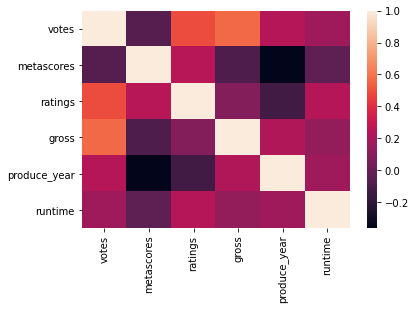

In [16]:
sns.heatmap(df.corr())

Nhận xét : Dựa vào biểu đồ ta thấy độ tương quan giữa votes, ratings, Gross là rõ ràng nhất.

#### Sử dụng biểu đồ cột để thể hiện số lượng phim mỗi năm trong dữ liệu

<AxesSubplot:>

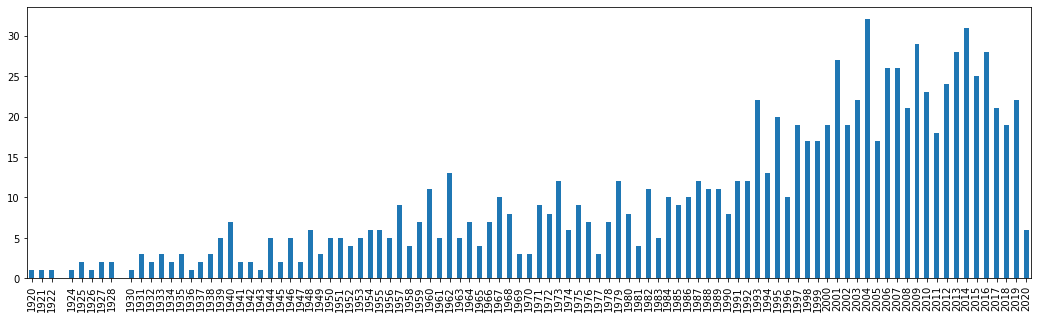

In [17]:
count_pro_year = df['produce_year'].value_counts().to_dict() # Đếm số phim mỗi năm cho vào dict
count_pro_year_items = count_pro_year.items() # Lấy các items của dict count_pro_year
count_pro_year_series = pd.Series(dict(sorted(count_pro_year_items))) # Sắp xếp theo năm và chuyển về series
f, ax = plt.subplots(figsize=(18,5))
count_pro_year_series.plot.bar()

Nhận xét : Từ biểu đồ trên đây ta thấy rằng các phim trong Top 1000 phim trên IMDB nằm chủ yếu vào khoảng 40 năm trở lại đây đặc biệt vào khoảng 20 năm đầu của thế kỷ XXI.

### Trực quan hóa biểu đồ cột độ phổ biển của các thể loại phim

<AxesSubplot:>

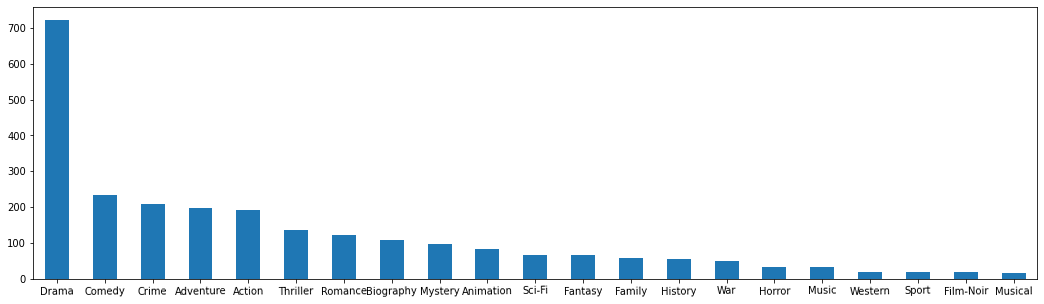

In [18]:
genres_df = df[['titles','genres']]
genres_df['genres'] = genres_df['genres'].str.split(',')
genres_df1 = genres_df['genres'].explode(',')
count_genres = genres_df1.value_counts()
f, ax = plt.subplots(figsize=(18,5))
count_genres.plot.bar(rot = 1)

Nhận xét : Qua biểu đồ ta thấy Thể loại Drama xuất hiện hơn 70% trong 1000 bộ phim của IMDb cách biệt hẳn so với độ phổ biến của các thể loại khác, đồng thời thấy được các thể loại phim nào đang thịnh hành nhất trên IMDb.

### Trực quan hóa độ phổ biến các thể loại phim đi cùng với thể loại Drama

<AxesSubplot:>

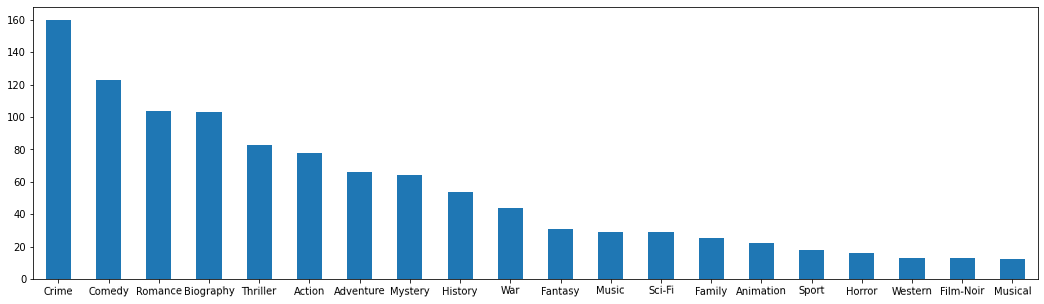

In [19]:
genres_df = genres_df.explode('genres')
idx_Drama_df = genres_df[genres_df['genres'] == 'Drama'].index
df_Drama_genres = genres_df.loc[idx_Drama_df]
df_Drama_genres
count_genres_2 = df_Drama_genres['genres'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
count_genres_2[1:].plot.bar(rot = 1)

Nhận xét: ta thấy rõ ở đây thể loại phim Crime là thể loại đi cùng phổ biến nhất với thể loại Drama so với các thể loại khác(gần 160 phim trên) và thứ tự độ phổ biến của mỗi thể loại đi cùng với thể loại Drama khác nhiều so với độ phổ biến của chúng trên toàn bộ dữ liệu.

## Đặt câu hỏi và trả lời câu hỏi

Các bộ phim nào đạt rating cao nhất mỗi năm ?

### Thực hiện thu thập các phim đạt ratings cao nhất trong mỗi năm của dữ liệu.

In [20]:
ratings_df = df[["ratings","produce_year"]] # Lấy 2 cột của dữ liệu cần thiết

In [21]:
produce_year_group = ratings_df.groupby("produce_year") # Gom nhóm các phim có cùng năm sản xuất

In [22]:
max_rating_idx = produce_year_group['ratings'].idxmax().values # lấy index của các phim đó theo lượng max ratings

Cuối cùng ta được danh sách các phim có ratings cao nhất các năm như sau 

In [23]:
df.iloc[max_rating_idx].head()

,titles,genres,certificates,votes,metascores,ratings,directors,stars,gross,introduction,produce_year,runtime
843,The Cabinet of Dr. Caligari,"Fantasy,Horror,Mystery",Not Rated,57205,NaN,8.1,Robert Wiene,"Werner Krauss, Conrad Veidt, Friedrich Feher, Lil Dagover",NaN,"Hypnotist Dr. Caligari uses a somnambulist, Cesare, to commit murders.",1920,67
781,The Kid,"Comedy,Drama,Family",Passed,112701,NaN,8.3,Charles Chaplin,"Charles Chaplin, Edna Purviance, Jackie Coogan, Carl Miller",5.45,"The Tramp cares for an abandoned child, but events put that relationship in jeopardy.",1921,68
705,Nosferatu,"Fantasy,Horror",Not Rated,88575,NaN,7.9,F.W. Murnau,"Max Schreck, Alexander Granach, Gustav von Wangenheim, Greta Schröder",NaN,Vampire Count Orlok expresses interest in a new residence and real estate agent Hutter's wife.,1922,94
962,Sherlock Jr.,"Action,Comedy,Romance",Passed,41693,NaN,8.2,Buster Keaton,"Buster Keaton, Kathryn McGuire, Joe Keaton, Erwin Connelly",0.98,"A film projectionist longs to be a detective, and puts his meagre skills to work when he is f...",1924,45
875,The Gold Rush,"Adventure,Comedy,Drama",Passed,100601,NaN,8.2,Charles Chaplin,"Charles Chaplin, Mack Swain, Tom Murray, Henry Bergman",5.45,A prospector goes to the Klondike in search of gold and finds it and more.,1925,95


### Ở đây ta xem top 10 đạo diễn có số lượng phim nhiều nhất

In [24]:
_df = df
_df['directors'] = _df['directors'].str.split(',')
directors_df = _df.explode('directors')
top_10_directors_df = pd.DataFrame()
top_10_directors = directors_df['directors'].value_counts()[:10]
top_10_directors

    Alfred Hitchcock     14
    Steven Spielberg     14
    Hayao Miyazaki       11
    Martin Scorsese      10
    Akira Kurosawa       10
    Billy Wilder          9
    Stanley Kubrick       9
    Woody Allen           9
    Quentin Tarantino     8
    Christopher Nolan     8
Name: directors, dtype: int64

In [25]:
for director in top_10_directors.index:
    top_10_directors_df = top_10_directors_df.append(directors_df[directors_df['directors'] == director])

#### Các phim của các đạo diễn trong top 10

In [26]:
top_10_directors_df 

,titles,genres,certificates,votes,metascores,ratings,directors,stars,gross,introduction,produce_year,runtime
182,Vertigo,"Mystery,Romance,Thriller",PG,363104,100.0,8.3,Alfred Hitchcock,"James Stewart, Kim Novak, Barbara Bel Geddes, Tom Helmore",3.20,A former police detective juggles wrestling with his personal demons and becoming obsessed wi...,1958,128
249,Psycho,"Horror,Mystery,Thriller",R,602170,97.0,8.5,Alfred Hitchcock,"Anthony Perkins, Janet Leigh, Vera Miles, John Gavin",32.00,"A Phoenix secretary embezzles $40,000 from her employer's client, goes on the run, and checks...",1960,109
309,Rear Window,"Mystery,Thriller",PG,442612,100.0,8.4,Alfred Hitchcock,"James Stewart, Grace Kelly, Wendell Corey, Thelma Ritter",36.76,A wheelchair-bound photographer spies on his neighbors from his apartment window and becomes ...,1954,112
364,North by Northwest,"Adventure,Mystery,Thriller",Approved,298227,98.0,8.3,Alfred Hitchcock,"Cary Grant, Eva Marie Saint, James Mason, Jessie Royce Landis",13.28,A New York City advertising executive goes on the run after being mistaken for a government a...,1959,136
444,Rebecca,"Drama,Mystery,Romance",Approved,123508,86.0,8.1,Alfred Hitchcock,"Laurence Olivier, Joan Fontaine, George Sanders, Judith Anderson",4.36,A self-conscious woman juggles adjusting to her new role as an aristocrat's wife and avoiding...,1940,130
...,...,...,...,...,...,...,...,...,...,...,...,...
45,The Prestige,"Drama,Mystery,Sci-Fi",PG-13,1185508,66.0,8.5,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johansson, Michael Caine",53.09,"After a tragic accident, two stage magicians engage in a battle to create the ultimate illusi...",2006,130
59,The Dark Knight Rises,"Action,Adventure",PG-13,1511587,78.0,8.4,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway, Gary Oldman",448.14,"Eight years after the Joker's reign of anarchy, Batman, with the help of the enigmatic Catwom...",2012,164
61,Dunkirk,"Action,Drama,History",PG-13,552100,94.0,7.8,Christopher Nolan,"Fionn Whitehead, Barry Keoghan, Mark Rylance, Tom Hardy",188.37,"Allied soldiers from Belgium, the British Empire, and France are surrounded by the German Arm...",2017,106
90,Batman Begins,"Action,Adventure",PG-13,1304296,70.0,8.2,Christopher Nolan,"Christian Bale, Michael Caine, Ken Watanabe, Liam Neeson",206.85,"After training with his mentor, Batman begins his fight to free crime-ridden Gotham City from...",2005,140


Ở đây chúng ta cùng phân tích độ phổ biến các thể loại phim mà top 10 đạo diễn có nhiều phim nhất trong top 1000 phim của IDMB đã làm

In [27]:
top_10_directors_df['genres'] = top_10_directors_df['genres'].str.split(',')

In [28]:
top_10_directors_df = top_10_directors_df.explode('genres')

In [29]:
count_genres_top10_directors = top_10_directors_df['genres'].value_counts()

Text(0.5, 1.0, "The popularity of the genres of top 10 directors's movie")

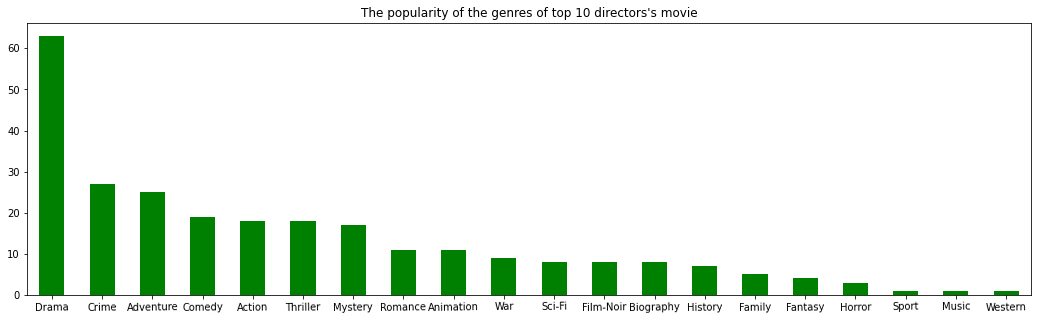

In [30]:
f, ax = plt.subplots(figsize=(18,5))
count_genres_top10_directors.plot.bar(rot=1,color='green')
plt.title("The popularity of the genres of top 10 directors's movie")

Nhận xét: Các thể loại phim được khai thác của top 10 đạo diễn nhiều phim nhất được thể hiện ở đây giúp cho ta biết được thể loại phim nào đang được các đạo diễn khai thác và trở nên thịnh hành nhất bao gồm Drama, Advanture, Crime, Comedy, Mystery, ...

## Tiếp tục tiền xử lý và xây dựng mô hình

In [31]:
new_df = df.drop(columns=["genres","titles","directors","stars","introduction","gross"],axis =1)
new_df

,certificates,votes,metascores,ratings,produce_year,runtime
0,PG,126286,83.0,8.1,2020,100
1,Not Rated,26017,81.0,7.8,2020,117
2,PG-13,800050,78.0,8.4,2019,181
3,R,230044,NaN,7.8,2019,113
4,R,540872,96.0,8.6,2019,132
...,...,...,...,...,...,...
995,Not Rated,73834,68.0,8.2,2007,153
996,Not Rated,60939,NaN,8.2,2013,186
997,Not Rated,39602,NaN,7.8,2012,126
998,PG-13,42998,NaN,8.0,2006,144


In [32]:
# Tách X và y
y_sr= new_df["ratings"] # sr là viết tắt của series
X_df = new_df.drop("ratings", axis=1)

In [33]:
# Tách tập huấn luyện và tập validation theo tỉ lệ 70%:30%
train_X_df, test_X_df, train_y_sr, test_y_sr = train_test_split(X_df, y_sr, test_size=0.3, 
                                                                 random_state=33)

In [34]:
print('train_X_df.shape',train_X_df.shape)
print('train_y_sr.shape',train_y_sr.shape)
print('test_X_df.shape',test_X_df.shape)


train_X_df.shape (700, 5)
train_y_sr.shape (700,)
test_X_df.shape (300, 5)


Ta sử dụng mô hình Support Vector Regression (SVR) để hồi qui tính toán kết quả rating. Ta sẽ thử nghiệm các siêu tham số của mô hình như sau:
- Siêu tham số 'kernel' có 4 giá trị: {'poly','rbf','sigmoid','linear'}.
- Siêu tham số 'C' có 6 giá trị: {0.001,0.01,0.1,1,10,100}.
- Siêu tham số 'gamma' có 2 giá trị: {'scale', 'auto'}. Nếu gamma='scale' = 1 / (n_features * X.var()). Nếu gamma =‘auto’= 1 / n_features.

In [35]:
category_cols = ["certificates"]
num_cols = ["runtime","votes","metascores","produce_year"]

SVRegression = SVR()

num_cols_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

category_cols_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])
genres_cols_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant'))])


preprocess_col = ColumnTransformer(
    transformers=[
        ('num', num_cols_transformer, num_cols),
        ('cat',category_cols_transformer ,category_cols)],remainder='passthrough')

preprocess_pipeline=Pipeline(steps=[
    ('preprocess', preprocess_col),
    ('scaler', StandardScaler())])

full_pipeline=Pipeline(steps=[
    ('preprocess_pipeline', preprocess_pipeline),
    ('SVR', SVRegression )])
full_pipeline

Pipeline(steps=[('preprocess_pipeline',
                 Pipeline(steps=[('preprocess',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer())]),
                                                                   ['runtime',
                                                                    'votes',
                                                                    'metascores',
                                                                    'produce_year']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['certificates'])])),
                                 ('scaler', StandardScaler())])),
                ('SVR', SVR())])

In [36]:
param_grid = {
    'SVR__kernel': ['poly','rbf','sigmoid','linear'],
    'SVR__C': [0.001,0.01,0.1,1,10,100],
    'SVR__gamma': ['scale', 'auto']
    }

search = GridSearchCV(full_pipeline, param_grid, cv=3)
search.fit(train_X_df, train_y_sr)
print("score :",search.score(train_X_df, train_y_sr))
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print('best param: ',search.best_params_)

score : 0.4839579422461685
Best parameter (CV score=0.443):
best param:  {'SVR__C': 0.1, 'SVR__gamma': 'scale', 'SVR__kernel': 'linear'}


Dự đoán kết quả và so sánh

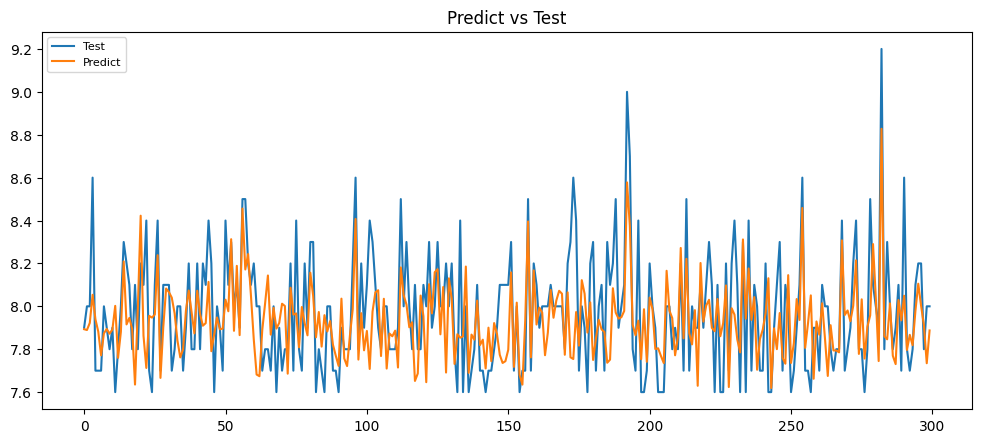

In [38]:
y_pre=search.predict(test_X_df)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test_y_sr.values, label='Test')
plt.plot(y_pre, label='Predict')
plt.title('Predict vs Test')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [39]:
 from sklearn.metrics import mean_squared_error
 print('MSE mo hinh: ', mean_squared_error(test_y_sr, y_pre))

MSE mo hinh:  0.051795337811972465


## Nhìn lại quá trình làm đồ án:

Đã gặp những khó khăn : 
- Khó khăn khi chọn 1 đề tài trả lời 1 câu hỏi có ý nghĩa và việc tự raw data khi tìm nguồn trên mạng.
- Khó khăn khi tiền xử lý dữ liệu mình đã tự raw. Nhóm vẫn chưa xử lý được các cột categorical data có nhiều giá trị như "genres","directors","stars" chuyển về dạng số và các cột bao gồm dữ liệu văn bản như "titles","introduction" cũng chưa có cách xử lý.


Những gì học được sau khi làm đồ án:
- Cách tự raw data.
- Cách khám phá dữ liệu cho nhiều kiểu dữ liệu khác nhau.
- Xây dựng pipeline cho tiền xử lý.
- Xây dựng mô hình và kiểm tra mô hình thích hợp với nhiều giá trị tham số.

Sẽ làm thêm nếu có thêm thời gian:
- Tìm kiếm cách xử lý các cột "titles","introduction","genres","directors","stars" chuyển đổi thành dạng có thể đưa vào mô hình học máy.

## Tài liệu tham khảo :

https://www.imdb.com/

https://en.wikipedia.org/wiki/IMDb
